### Importing the relevant libraries and dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("5G_energy_consumption_dataset.csv")
#data = pd.read_csv("5G_energy_consumption_dataset.csv", parse_dates = ["Time"])

### Performing data quality check

In [3]:
data.head()

,Time,BS,Energy,load,ESMODE,TXpower
0,20230101 010000,B_0,64.275037,0.487936,0.0,7.101719
1,20230101 020000,B_0,55.904335,0.344468,0.0,7.101719
2,20230101 030000,B_0,57.698057,0.193766,0.0,7.101719
3,20230101 040000,B_0,55.156951,0.222383,0.0,7.101719
4,20230101 050000,B_0,56.053812,0.175436,0.0,7.101719


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92629 entries, 0 to 92628
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Time     92629 non-null  object 
 1   BS       92629 non-null  object 
 2   Energy   92629 non-null  float64
 3   load     92629 non-null  float64
 4   ESMODE   92629 non-null  float64
 5   TXpower  92629 non-null  float64
dtypes: float64(4), object(2)
memory usage: 4.2+ MB


#### Converting the Time column into a Datetime Object

In [5]:
data["Time"] = pd.to_datetime(data["Time"])

In [6]:
data.head()

,Time,BS,Energy,load,ESMODE,TXpower
0,2023-01-01 01:00:00,B_0,64.275037,0.487936,0.0,7.101719
1,2023-01-01 02:00:00,B_0,55.904335,0.344468,0.0,7.101719
2,2023-01-01 03:00:00,B_0,57.698057,0.193766,0.0,7.101719
3,2023-01-01 04:00:00,B_0,55.156951,0.222383,0.0,7.101719
4,2023-01-01 05:00:00,B_0,56.053812,0.175436,0.0,7.101719


#### Converting the "BS" column into encoded numbers (2 methods)

In [7]:
data["BS"].value_counts()

B_583     130
B_261     128
B_728     128
B_669     128
B_512     126
         ... 
B_1018     16
B_921      14
B_905      13
B_854       1
B_835       1
Name: BS, Length: 923, dtype: int64

#### Method 1

In [8]:
from sklearn.preprocessing import LabelEncoder

bs_le = LabelEncoder()

bs_le.fit_transform(data["BS"])

array([ 0,  0,  0, ..., 10, 10, 10])

In [9]:
data["BS"] = data["BS"].str[2:]

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92629 entries, 0 to 92628
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Time     92629 non-null  datetime64[ns]
 1   BS       92629 non-null  object        
 2   Energy   92629 non-null  float64       
 3   load     92629 non-null  float64       
 4   ESMODE   92629 non-null  float64       
 5   TXpower  92629 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 4.2+ MB


#### Method 2


In [11]:
data["BS"] = data["BS"].astype(int)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92629 entries, 0 to 92628
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Time     92629 non-null  datetime64[ns]
 1   BS       92629 non-null  int32         
 2   Energy   92629 non-null  float64       
 3   load     92629 non-null  float64       
 4   ESMODE   92629 non-null  float64       
 5   TXpower  92629 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int32(1)
memory usage: 3.9 MB


In [13]:
data.head()

,Time,BS,Energy,load,ESMODE,TXpower
0,2023-01-01 01:00:00,0,64.275037,0.487936,0.0,7.101719
1,2023-01-01 02:00:00,0,55.904335,0.344468,0.0,7.101719
2,2023-01-01 03:00:00,0,57.698057,0.193766,0.0,7.101719
3,2023-01-01 04:00:00,0,55.156951,0.222383,0.0,7.101719
4,2023-01-01 05:00:00,0,56.053812,0.175436,0.0,7.101719


#### Viewing all the possible combination of charts for the columns

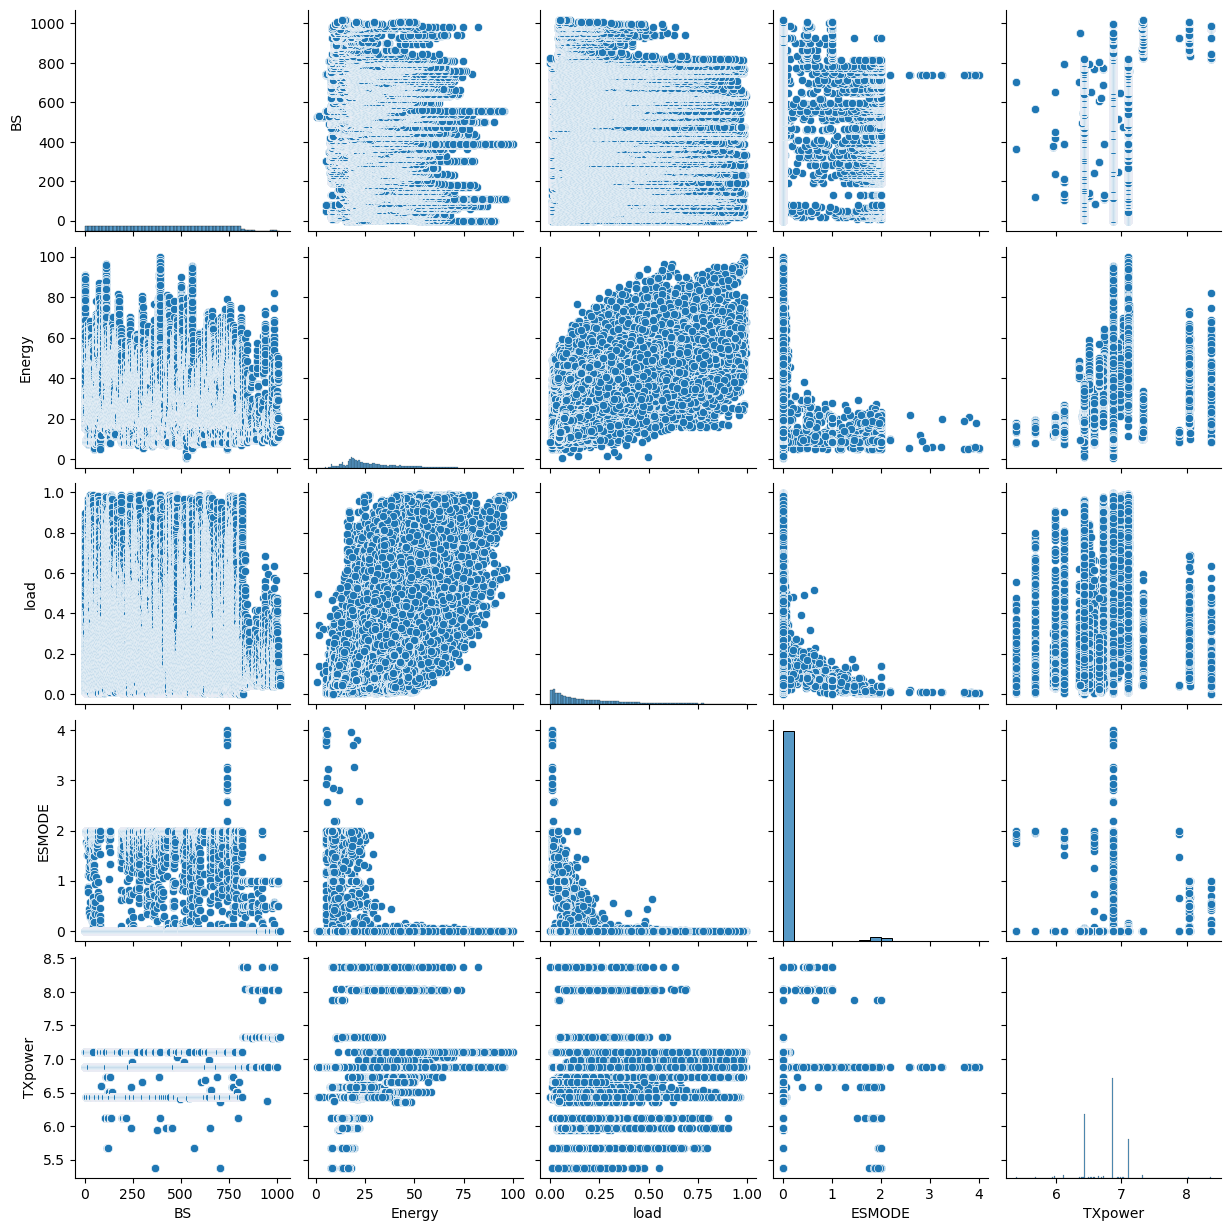

In [14]:
import seaborn as sns

sns.pairplot(data)

### Note: There is no clear linear relationship. So we expect that all linear models should fail or not do so well

### Exploring the Time column

<Axes: xlabel='Time', ylabel='Energy'>

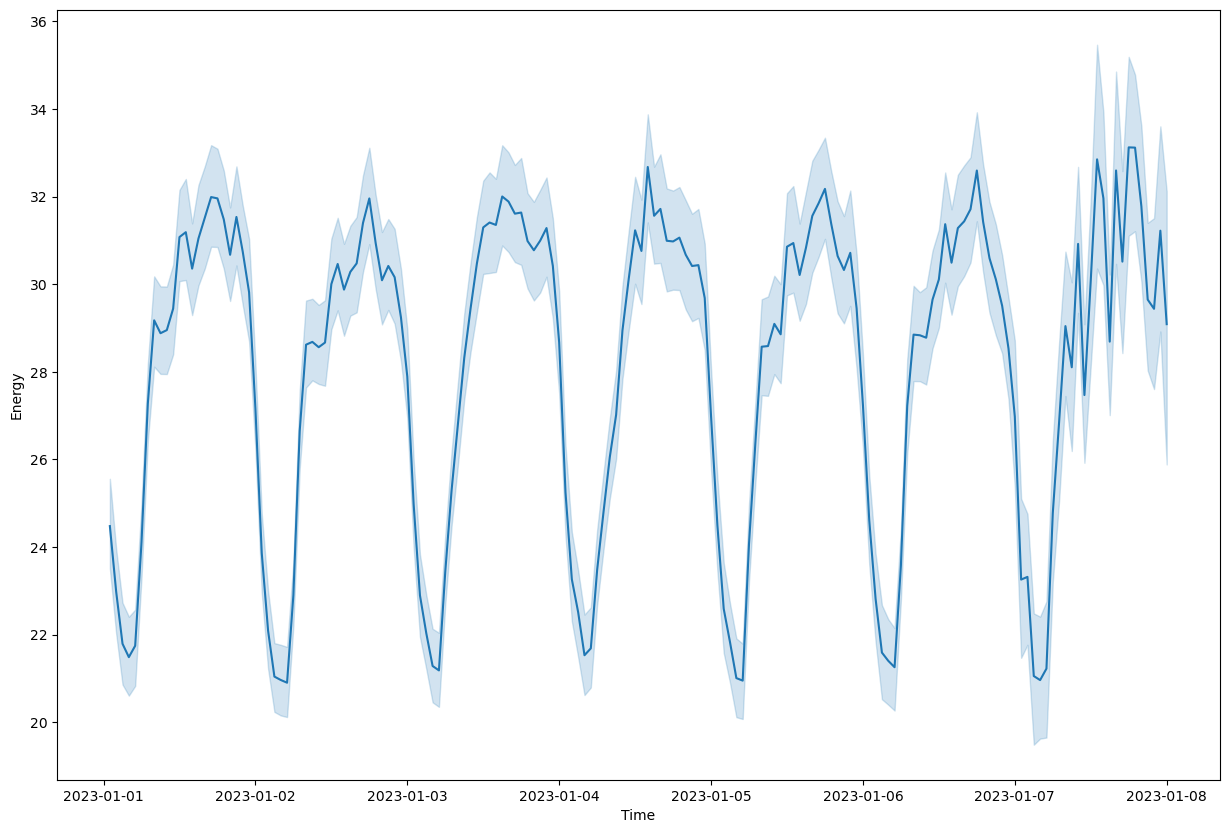

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15, 10))
sns.lineplot(data = data, x = "Time", y = "Energy")

#### Because of the pattern above, we can conclude that some portion of the Time column is useful for our prediction of Energy

#### We can derive the hour and day number from the date time axis given

In [16]:
data["hour"] = data["Time"].dt.hour

In [17]:
data["day"] = data["Time"].dt.day

In [18]:
data.head()

,Time,BS,Energy,load,ESMODE,TXpower,hour,day
0,2023-01-01 01:00:00,0,64.275037,0.487936,0.0,7.101719,1,1
1,2023-01-01 02:00:00,0,55.904335,0.344468,0.0,7.101719,2,1
2,2023-01-01 03:00:00,0,57.698057,0.193766,0.0,7.101719,3,1
3,2023-01-01 04:00:00,0,55.156951,0.222383,0.0,7.101719,4,1
4,2023-01-01 05:00:00,0,56.053812,0.175436,0.0,7.101719,5,1


#### Doing further exploration on the time derivatives from the Time column

<Axes: xlabel='hour', ylabel='Energy'>

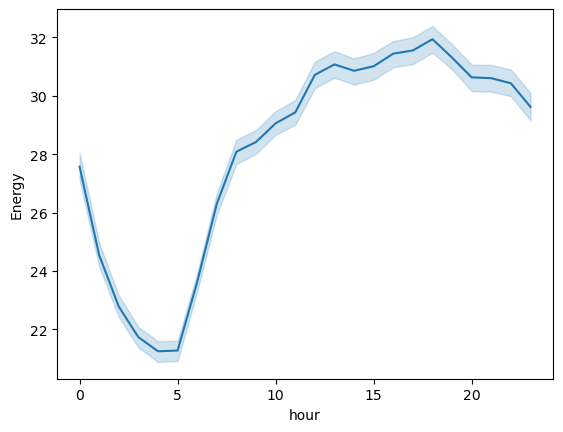

In [19]:
sns.lineplot(data = data, x = "hour", y = "Energy")

<Axes: xlabel='day', ylabel='Energy'>

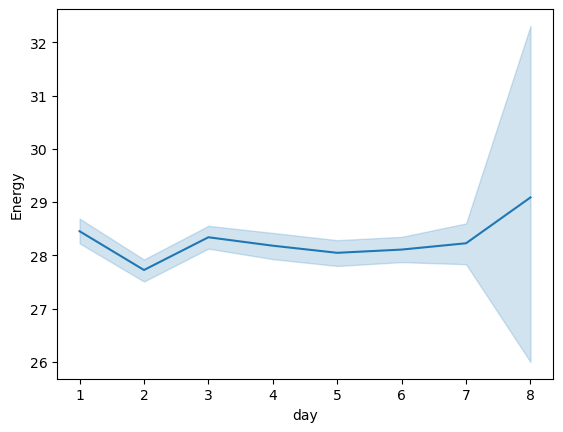

In [20]:
sns.lineplot(data = data, x = "day", y = "Energy")

#### Preparing the data for Machine learning

In [21]:
data.drop(["Energy"], axis = 1)

,Time,BS,load,ESMODE,TXpower,hour,day
0,2023-01-01 01:00:00,0,0.487936,0.0,7.101719,1,1
1,2023-01-01 02:00:00,0,0.344468,0.0,7.101719,2,1
2,2023-01-01 03:00:00,0,0.193766,0.0,7.101719,3,1
3,2023-01-01 04:00:00,0,0.222383,0.0,7.101719,4,1
4,2023-01-01 05:00:00,0,0.175436,0.0,7.101719,5,1
...,...,...,...,...,...,...,...
92624,2023-01-02 17:00:00,1018,0.087538,0.0,7.325859,17,2
92625,2023-01-02 18:00:00,1018,0.082635,0.0,7.325859,18,2
92626,2023-01-02 21:00:00,1018,0.055538,0.0,7.325859,21,2
92627,2023-01-02 22:00:00,1018,0.058077,0.0,7.325859,22,2


In [22]:
x = data.drop(["Energy", "Time"], axis = 1)

y = data["Energy"]

In [40]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x, y)

### Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

In [25]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
r2 = r2_score(y_pred, y_test)

mse = mean_squared_error(y_pred, y_test)

mae = mean_absolute_error(y_pred, y_test)

print(f"r-square = {r2}\nmean squared error = {mse}\nmean absolute error = {mae}")

r-square = 0.19916034679173267
mean squared error = 86.16933264853881
mean absolute error = 6.916153723265255


In [26]:
np.sqrt(86.48629336612103)

9.2998007164735

In [27]:
data.head()

,Time,BS,Energy,load,ESMODE,TXpower,hour,day
0,2023-01-01 01:00:00,0,64.275037,0.487936,0.0,7.101719,1,1
1,2023-01-01 02:00:00,0,55.904335,0.344468,0.0,7.101719,2,1
2,2023-01-01 03:00:00,0,57.698057,0.193766,0.0,7.101719,3,1
3,2023-01-01 04:00:00,0,55.156951,0.222383,0.0,7.101719,4,1
4,2023-01-01 05:00:00,0,56.053812,0.175436,0.0,7.101719,5,1


In [28]:
x.values

array([[0.00000000e+00, 4.87936170e-01, 0.00000000e+00, 7.10171898e+00,
        1.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 3.44468085e-01, 0.00000000e+00, 7.10171898e+00,
        2.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.93765957e-01, 0.00000000e+00, 7.10171898e+00,
        3.00000000e+00, 1.00000000e+00],
       ...,
       [1.01800000e+03, 5.55384620e-02, 0.00000000e+00, 7.32585949e+00,
        2.10000000e+01, 2.00000000e+00],
       [1.01800000e+03, 5.80769230e-02, 0.00000000e+00, 7.32585949e+00,
        2.20000000e+01, 2.00000000e+00],
       [1.01800000e+03, 4.81730770e-02, 0.00000000e+00, 7.32585949e+00,
        2.30000000e+01, 2.00000000e+00]])

### Polynomial Regression

In [29]:
from sklearn.preprocessing import PolynomialFeatures 

lr2 = LinearRegression()
poly = PolynomialFeatures(degree = 4)

x_ = poly.fit_transform(x)

x_

array([[1.00000000e+00, 0.00000000e+00, 4.87936170e-01, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 3.44468085e-01, ...,
        4.00000000e+00, 2.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 1.93765957e-01, ...,
        9.00000000e+00, 3.00000000e+00, 1.00000000e+00],
       ...,
       [1.00000000e+00, 1.01800000e+03, 5.55384620e-02, ...,
        1.76400000e+03, 1.68000000e+02, 1.60000000e+01],
       [1.00000000e+00, 1.01800000e+03, 5.80769230e-02, ...,
        1.93600000e+03, 1.76000000e+02, 1.60000000e+01],
       [1.00000000e+00, 1.01800000e+03, 4.81730770e-02, ...,
        2.11600000e+03, 1.84000000e+02, 1.60000000e+01]])

In [30]:
x_train,x_test, y_train, y_test = train_test_split(x_, y)

In [31]:
lr = LinearRegression()

lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

In [32]:
r2 = r2_score(y_pred, y_test)

mse = mean_squared_error(y_pred, y_test)

mae = mean_absolute_error(y_pred, y_test)

print(f"r-square = {r2}\nmean squared error = {mse}\nmean absolute error = {mae}")

r-square = 0.5472817250100055
mean squared error = 61.707457166005554
mean absolute error = 5.507055616664148


In [33]:
data.head()

,Time,BS,Energy,load,ESMODE,TXpower,hour,day
0,2023-01-01 01:00:00,0,64.275037,0.487936,0.0,7.101719,1,1
1,2023-01-01 02:00:00,0,55.904335,0.344468,0.0,7.101719,2,1
2,2023-01-01 03:00:00,0,57.698057,0.193766,0.0,7.101719,3,1
3,2023-01-01 04:00:00,0,55.156951,0.222383,0.0,7.101719,4,1
4,2023-01-01 05:00:00,0,56.053812,0.175436,0.0,7.101719,5,1


### Decision Trees

In [41]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

dtr.fit(x_train, y_train)

y_pred = dtr.predict(x_test)

In [42]:
r2 = r2_score(y_pred, y_test)

mse = mean_squared_error(y_pred, y_test)

mae = mean_absolute_error(y_pred, y_test)

print(f"r-square = {r2}\nmean squared error = {mse}\nmean absolute error = {mae}")

r-square = 0.9329922360192908
mean squared error = 13.162476877028073
mean absolute error = 2.1269756559667066


### Random Forest

In [43]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(verbose = 1, n_jobs = -1)

rfr.fit(x_train,y_train)

y_pred = rfr.predict(x_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.7s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.1s finished


In [44]:
r2 = r2_score(y_pred, y_test)

mse = mean_squared_error(y_pred, y_test)

mae = mean_absolute_error(y_pred, y_test)

print(f"r-square = {r2}\nmean squared error = {mse}\nmean absolute error = {mae}")

r-square = 0.9631892750024531
mean squared error = 6.8601927259840805
mean absolute error = 1.6500188281994561


In [55]:
rfr.feature_importances_

array([0.13069812, 0.27485529, 0.01312046, 0.54956708, 0.02435947,
       0.00739957])

Text(0.5, 1.0, 'Most Important Features')

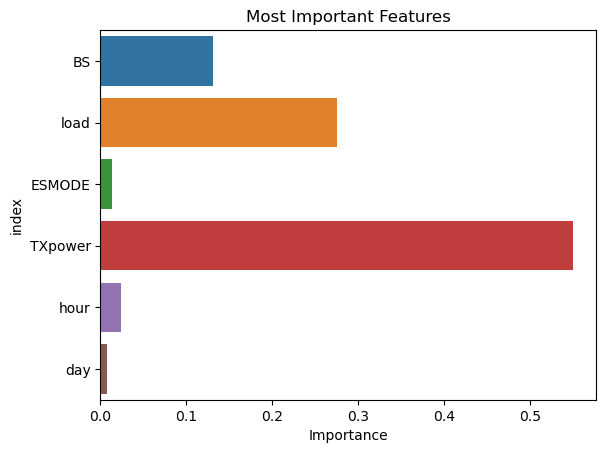

In [66]:
importance_df = pd.DataFrame(rfr.feature_importances_, columns = ["Importance"], index = x.columns)

importance_df = importance_df.reset_index()

sns.barplot(data = importance_df, x = "Importance", y = "index")
plt.title("Most Important Features")

### Checking how good the predictions are on a scatter plot.

If the predictions and the y_test values form an almost straight line at a 45-degree angle, then, our prediction is very good. The more our graph deviates from 45 degrees, the less accurate our predictions are.
(**Note**: This pertains to regression problems only)

In [47]:
y_pred_df = pd.DataFrame(y_pred, index = y_test.index, columns= ["Predictions"])
y_pred_df

,Predictions
62543,14.348281
88478,17.991031
21745,25.872945
20485,25.692078
56880,32.863976
...,...
30943,29.964126
32360,18.599402
70136,64.038864
4034,17.520179


In [50]:
prediction_df = pd.concat([y_test, y_pred_df], axis = 1)
prediction_df

,Energy,Predictions
62543,13.901345,14.348281
88478,16.741405,17.991031
21745,27.802691,25.872945
20485,21.225710,25.692078
56880,31.240658,32.863976
...,...,...
30943,29.895366,29.964126
32360,16.591928,18.599402
70136,65.919283,64.038864
4034,17.339312,17.520179


<Axes: xlabel='Predictions', ylabel='Energy'>

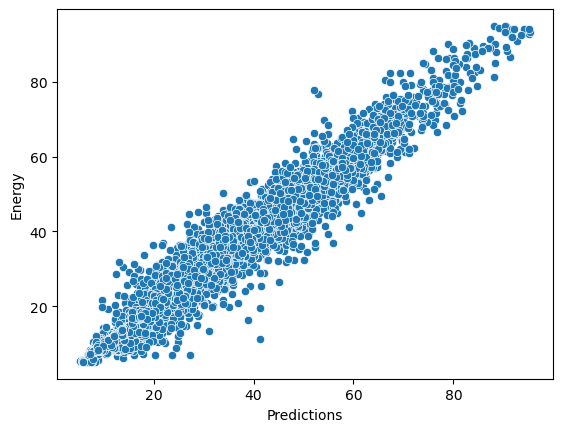

In [54]:
sns.scatterplot(data = prediction_df, x = "Predictions", y = "Energy")